In [56]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [57]:
dataset=pd.read_csv('FineTech_appData.csv')

In [58]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [59]:
dataset.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [60]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


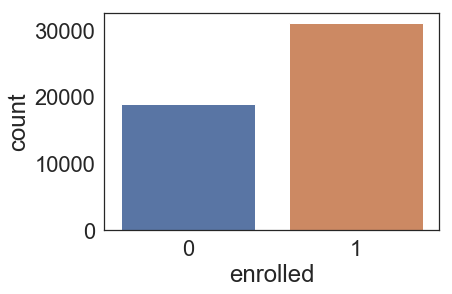

In [61]:
sns.countplot(dataset['enrolled'])

In [62]:
dataset.shape

(50000, 12)

In [63]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

In [64]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [65]:
dataset2=dataset.copy().drop(columns=['user','first_open','enrolled_date','enrolled','screen_list'])

In [66]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [67]:
dataset2.shape

(50000, 7)

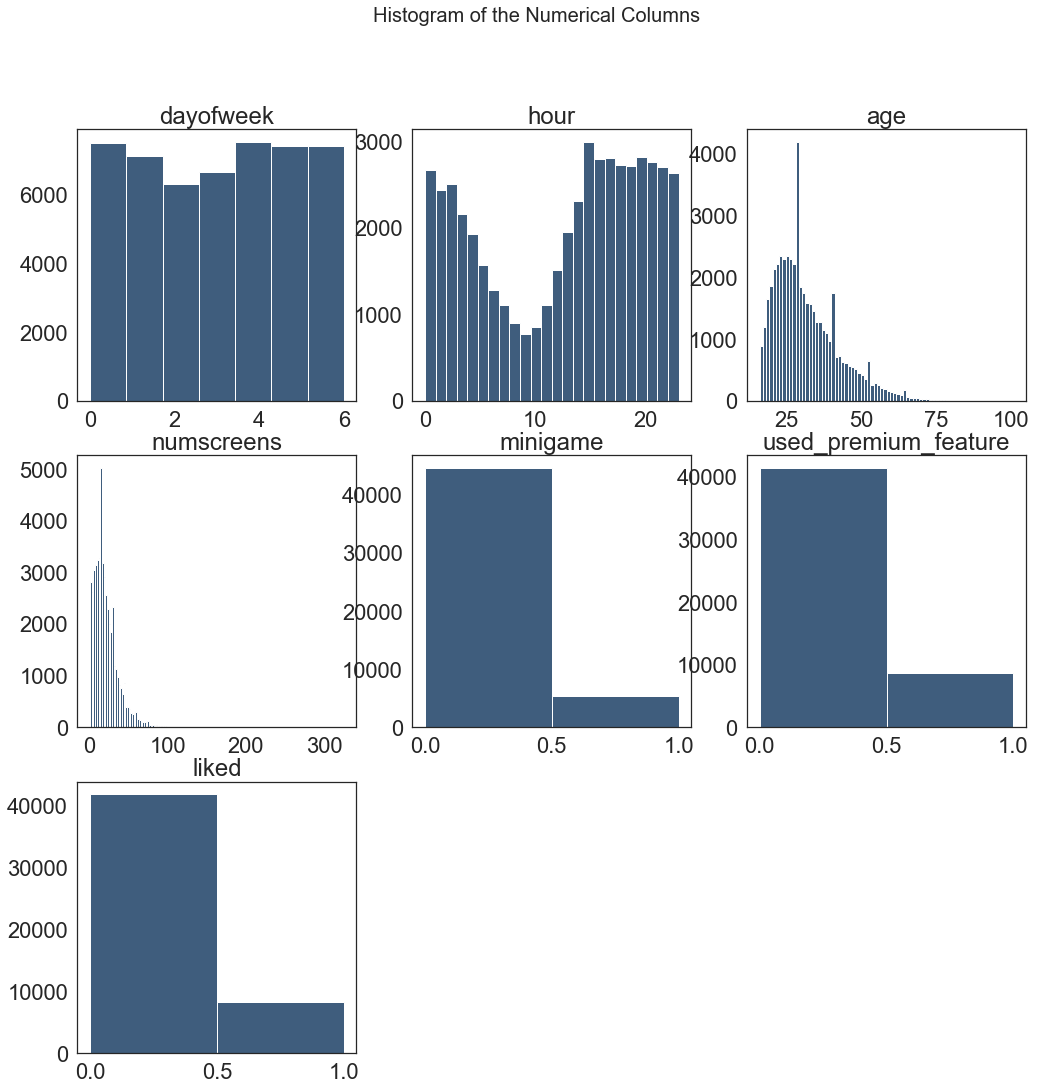

In [68]:
## Histogram

plt.figure(figsize=(17,17))
plt.suptitle('Histogram of the Numerical Columns',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals=np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')

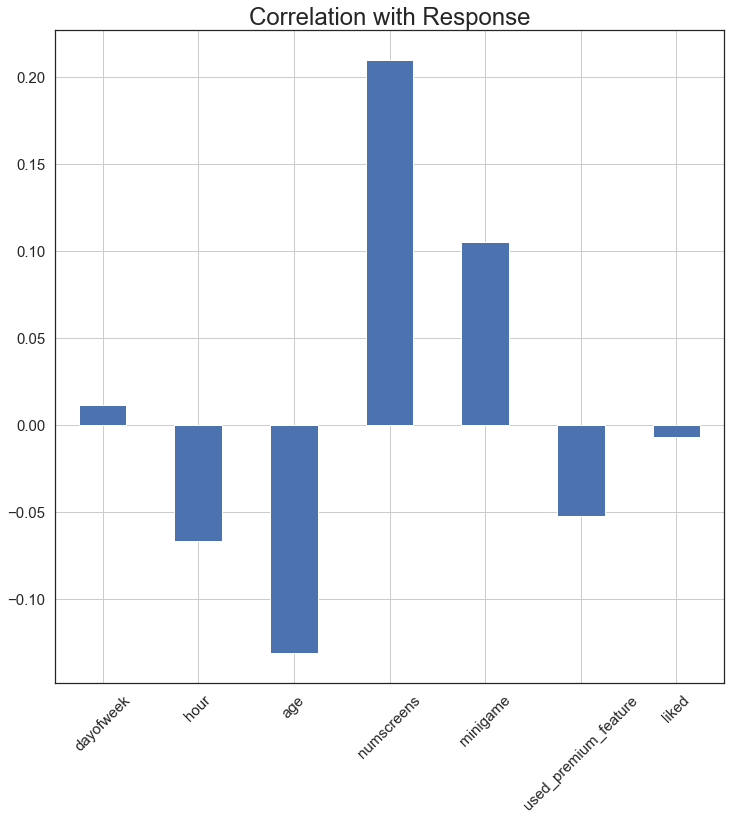

In [69]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(12,12),grid=True,title='Correlation with Response',fontsize=15,rot=45)

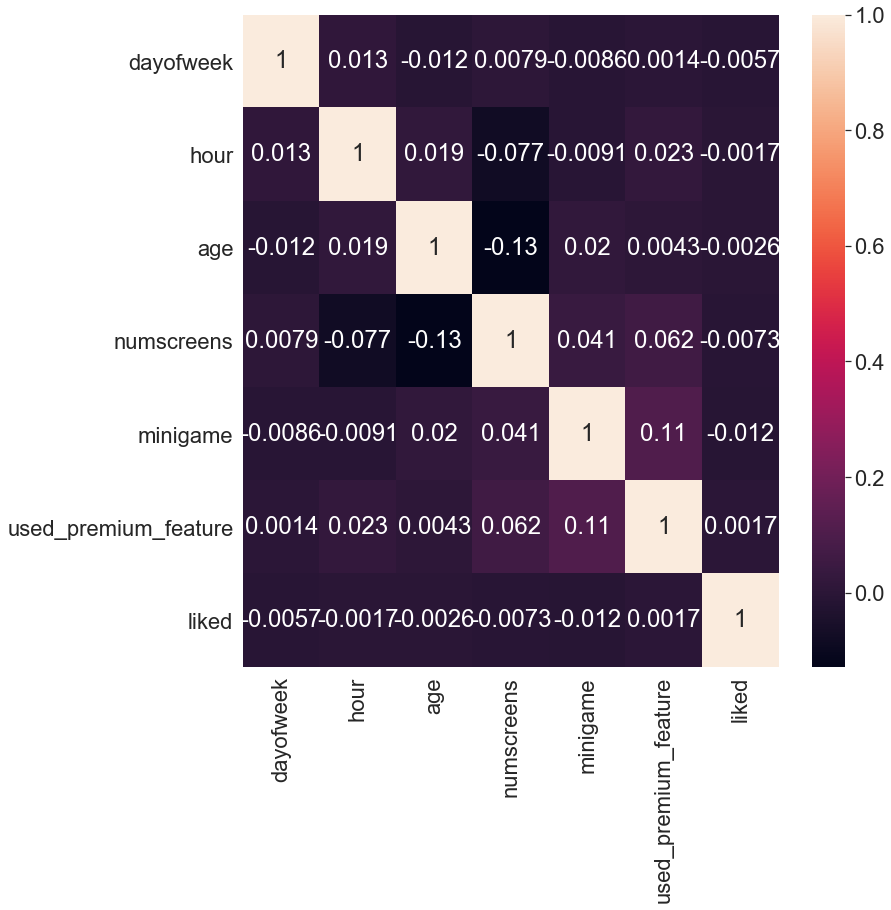

In [70]:
## Stylist cool matrix and the professional one

plt.figure(figsize=(12,12))
corr=dataset2.corr()
sns.heatmap(corr,annot=True)

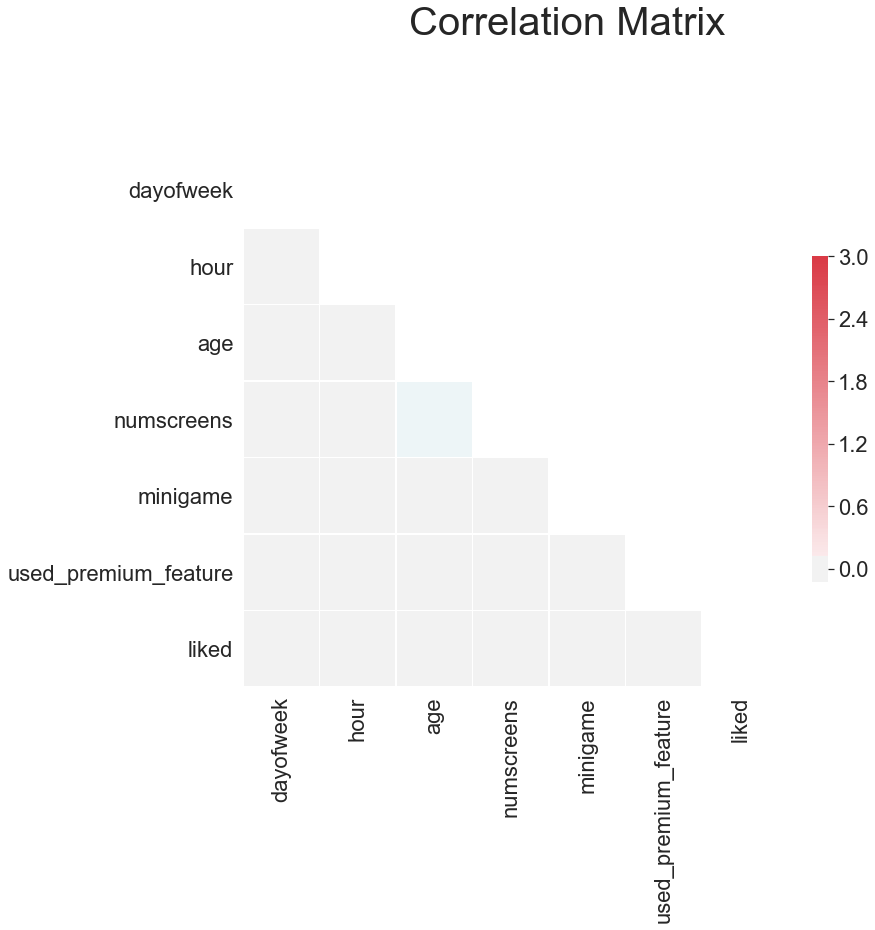

In [71]:
sns.set(style='white',font_scale=2)

corr=dataset2.corr()

mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

fig,axes=plt.subplots(figsize=(12,12))
fig.suptitle('Correlation Matrix',fontsize=40)

cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [72]:
dataset2.dtypes

dayofweek               int64
hour                    int32
age                     int64
numscreens              int64
minigame                int64
used_premium_feature    int64
liked                   int64
dtype: object

In [73]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [74]:
dataset['first_open']=[parser.parse(row_data) for row_data in dataset['first_open']]

In [75]:
dataset['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]

In [76]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [77]:
dataset['diff']=(dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')

In [78]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
diff                           float64
dtype: object

Text(0.5, 1.0, 'Distribution of the Time Since Enrolled')

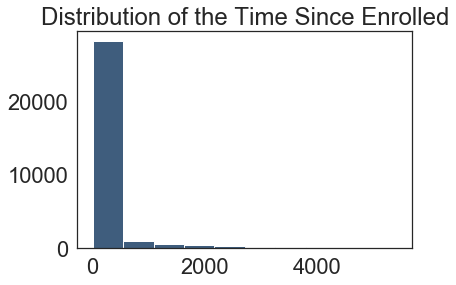

In [79]:
plt.hist(dataset['diff'].dropna(),color='#3F5D7D')
plt.title('Distribution of the Time Since Enrolled')

Text(0.5, 1.0, 'Distribution of the Time Since Enrolled')

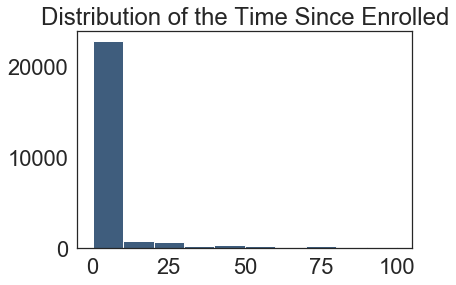

In [80]:
plt.hist(dataset['diff'].dropna(),color='#3F5D7D',range=[0,100])
plt.title('Distribution of the Time Since Enrolled')

Text(0.5, 1.0, 'Distribution of the Time Since Enrolled')

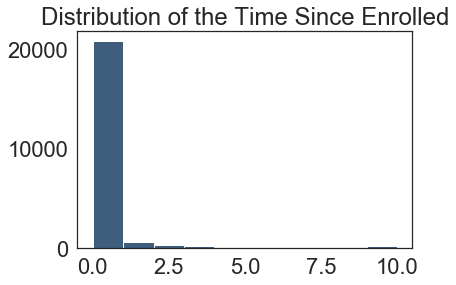

In [81]:
plt.hist(dataset['diff'].dropna(),color='#3F5D7D',range=[0,10])
plt.title('Distribution of the Time Since Enrolled')

In [82]:
dataset.loc[dataset['diff'] > 48,'enrolled']=0

In [83]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,diff
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [84]:
## Now dropping the unnecessary columns
dataset=dataset.drop(columns=['diff','first_open','enrolled_date'])

In [85]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [86]:
## Formating screen list field

In [87]:
top_screen=pd.read_csv('top_screens.csv')

In [88]:
top_screen.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [89]:
top_screen.shape

(58, 2)

In [90]:
top_screen=top_screen['top_screens'].values

In [91]:
top_screen #list of most populer screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [92]:
dataset['screen_list']=dataset.screen_list.astype(str)+','

In [93]:
dataset['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
5        idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...
6              product_review,product_review2,ScanPreview,
7        Splash,Cycle,Home,Credit3Container,Credit3Dash...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,Loan2,product_review,product_review,produ...
10       Splash,idscreen,Home,RewardsContainer,Settings...
11       product_review,Home,Loan2,Credit3Container,Ver...
12       idscreen,joinscreen,Cycle,product_review,produ...
13               Alerts,ProfilePage,Home,Credit3Container,
14       joinscreen,product_review,product_review2,Scan...
15       idscreen,joinscreen,Cycle,Loan2,product_review...
16       product_review,product_review,product_review,p.

In [94]:
for sc in top_screen:
    dataset[sc]=dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list']=dataset.screen_list.str.replace(sc+",","")

In [95]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
dataset['other']=dataset.screen_list.str.count(",")
dataset=dataset.drop(columns=["screen_list"])

In [97]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [98]:
## Funnel
# take sum of all saving screen in one place
savings_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
dataset['SavingsCount'] = dataset[savings_screens].sum(axis = 1)
dataset=dataset.drop(columns=savings_screens)

In [99]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


In [100]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
dataset['CMCount'] = dataset[credit_screens].sum(axis = 1)
dataset=dataset.drop(columns=credit_screens)

In [101]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
dataset['CCCount'] = dataset[cc_screens].sum(axis = 1)
dataset=dataset.drop(columns=cc_screens)

In [102]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
dataset['LoansCount'] = dataset[loan_screens].sum(axis = 1)
dataset=dataset.drop(columns=loan_screens)

In [103]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [104]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [105]:
dataset.shape

(50000, 50)

## Data Processing

In [107]:
response=dataset['enrolled']
dataset=dataset.drop(columns='enrolled')

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(dataset,response, test_size=0.2, random_state=0)

In [110]:
X_train.shape

(40000, 49)

In [111]:
X_test.shape

(10000, 49)

In [112]:
train_identifier=X_train['user']
X_train=X_train.drop(columns='user')

In [113]:
test_identifier=X_test['user']
X_test=X_test.drop(columns='user')

In [114]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.fit_transform(X_test))

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [115]:
X_train2

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
2,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
3,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
4,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
5,1.464753,1.135280,0.302593,0.055556,-0.346830,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,1.857638,0.057524,-0.289185,1.785389
6,-0.504961,0.866394,-0.898034,-0.326426,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,8.629699,-0.091207,-0.087221,-1.147303,-0.260877,0.057524,2.962372,0.309800
7,-0.997389,-0.612478,-0.805679,1.328829,-0.346830,2.186018,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
8,-0.012532,-1.419136,0.302593,-0.517417,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,0.309800
9,-0.504961,0.731951,1.318508,0.501202,-0.346830,-0.457453,2.246319,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,2.520213,-0.289185,0.309800


In [116]:
X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

In [117]:
X_train2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
48372,1.464753,1.135280,0.302593,0.055556,-0.346830,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,1.857638,0.057524,-0.289185,1.785389
5524,-0.504961,0.866394,-0.898034,-0.326426,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,8.629699,-0.091207,-0.087221,-1.147303,-0.260877,0.057524,2.962372,0.309800
38032,-0.997389,-0.612478,-0.805679,1.328829,-0.346830,2.186018,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
14944,-0.012532,-1.419136,0.302593,-0.517417,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,0.309800
22793,-0.504961,0.731951,1.318508,0.501202,-0.346830,-0.457453,2.246319,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,2.520213,-0.289185,0.309800


In [118]:
X_test2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
11841,-1.496239,-1.554724,0.866223,0.824043,-0.350843,-0.449198,2.262731,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,1.329613,-0.255034,-0.756633,-0.286358,-1.155734
19602,0.958624,-0.882463,-0.535024,0.571073,-0.350843,-0.449198,-0.441944,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.778912,-0.255034,-0.756633,-0.286358,0.322565
45519,-1.496239,0.327606,0.492557,-0.630533,-0.350843,2.226191,-0.441944,-1.024090,-0.644537,-1.042085,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.322491,-0.255034,0.066599,-0.286358,1.800864
25747,0.958624,0.865414,-1.002106,-0.504049,-0.350843,-0.449198,2.262731,-1.024090,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.503561,-0.255034,-0.756633,-0.286358,-1.155734
42642,0.958624,-1.554724,-0.161358,0.697558,-0.350843,-0.449198,-0.441944,-1.024090,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.597841,1.947331,-0.756633,3.027972,-1.155734
31902,0.467652,0.999867,0.212308,2.405104,-0.350843,-0.449198,-0.441944,0.976477,1.551501,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.228211,1.213209,-0.756633,-0.286358,0.322565
30346,-1.005267,-1.151367,-1.095523,0.318103,-0.350843,-0.449198,-0.441944,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,1.880314,-0.255034,-0.756633,-0.286358,0.322565
12363,0.958624,0.730962,-0.535024,-0.187836,-0.350843,-0.449198,-0.441944,-1.024090,-0.644537,-1.042085,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.047140,-0.255034,0.066599,-0.286358,1.800864
32490,-1.496239,0.596510,-0.628440,1.266740,-0.350843,-0.449198,-0.441944,0.976477,1.551501,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,1.604963,1.947331,2.536296,-0.286358,0.322565
26128,-0.023321,0.058702,1.426721,-1.136473,-0.350843,-0.449198,2.262731,-1.024090,-0.644537,-1.042085,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-1.699243,-0.255034,-0.756633,1.370807,0.322565


In [119]:
X_train=X_train2
X_test=X_test2

#### We do scaling process so that the values with higher range does not infuence the model just because they have higher range of values.

## Model Building

In [121]:
from sklearn.linear_model import LogisticRegression

In [123]:
classifier=LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
y_predict=classifier.predict(X_test)

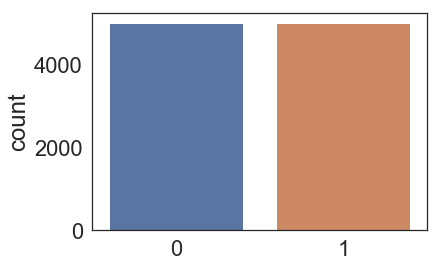

In [127]:
sns.countplot(y_predict)

In [128]:
y_predict

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

## Model Evaluation

In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

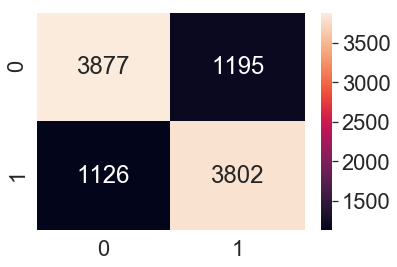

In [137]:
cm=confusion_matrix(y_test,y_predict)
df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
sns.heatmap(cm,annot=True,fmt='g')

In [131]:
accuracy_score(y_test,y_predict)

0.7679

In [132]:
f1_score(y_test,y_predict)

0.7661460957178842

In [133]:
precision_score(y_test,y_predict)

0.760856513908345

In [134]:
recall_score(y_test,y_predict)

0.7715097402597403

In [ ]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

In [140]:
print("Logistic Accuracies : %0.3f (+/- %0.3f)"%(acc.mean(),acc.std()*2))

Logistic Accuracies : 0.767 (+/- 0.010)


## Result

In [147]:
final_results=pd.concat([y_test,test_identifier],axis=1).dropna()

In [148]:
final_results['predicted_result']=y_predict
final_results[['user','enrolled','predicted_result']].reset_index(drop=True)

,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
